# <span style='color:Yellow' > <span style='background :Black' > Project : House Prices Prediction

<img src = 'Photo.jpg'>

## <span style='color:Blue' > EDA , Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\Animesh\\IVY notebooks\\Project\\Housing Price'

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [7]:
train.shape

(1460, 81)

In [8]:
test.shape

(1459, 80)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
#test.info()

In [11]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
numeric_col = train.select_dtypes(include = ['float64' , 'int64'])
numeric_col.drop("Id" , axis = 1 , inplace = True)

## <span style='color : blue' > Outlier checking

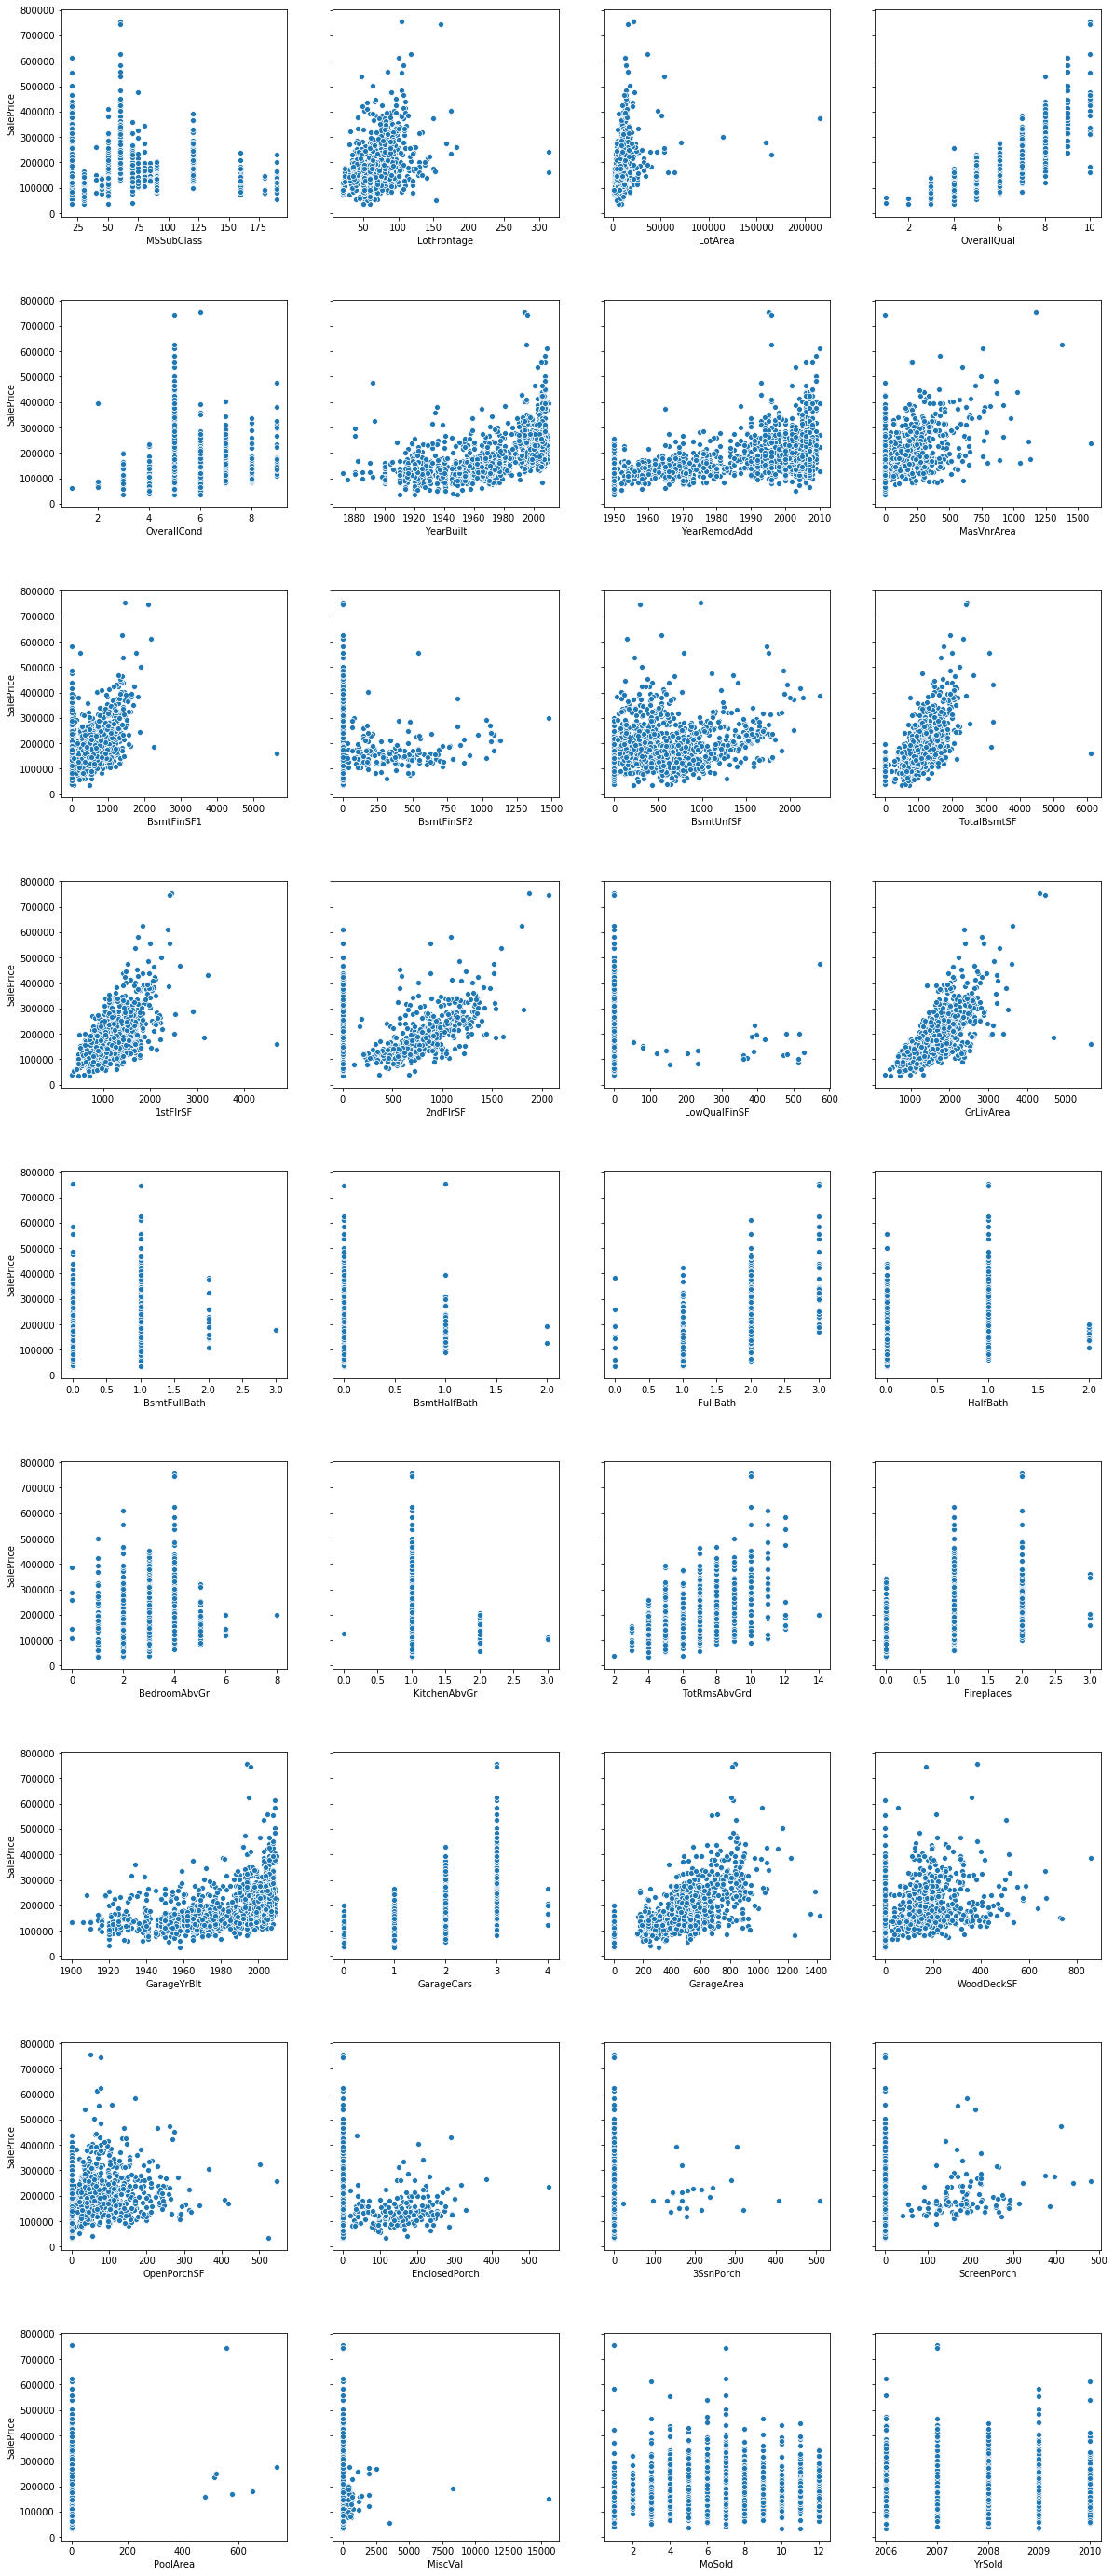

In [13]:
num_features = numeric_col.columns
nrows = 9
ncols = int(len(num_features)/9)
fig , ax = plt.subplots(nrows = nrows , ncols =ncols , figsize = (20,50), sharey = True)
fig.subplots_adjust(wspace=0.2,hspace=0.4)
for row in range(nrows):
    for col in range(ncols):
        sns.scatterplot(numeric_col[num_features[row*ncols+col]] ,numeric_col["SalePrice"] ,ax = ax[row , col] )

In [14]:
train.drop(index=train['LotFrontage'].sort_values(ascending=False)[:2].index,inplace=True)
numeric_col.drop(index=numeric_col["LotFrontage"].sort_values(ascending=False)[:2].index,inplace=True)

In [15]:
#fig , ax =plt.subplots()
#ax.scatter(x=numeric_col["LotFrontage"],y=numeric_col["SalePrice"])
#plt.ylabel("SalePrice" , fontsize = 12)
#plt.xlabel("LotFrontage" , fontsize = 12)
#plt.show()

#### <span style='background :violet' > Now drop the 'Id' column from train and test data sets

In [15]:
train_id = train["Id"]
test_id = test["Id"]

train.drop("Id", axis = 1 , inplace = True)
test.drop("Id" , axis =1 , inplace = True)

In [16]:
#number of rows present in train and test dataset for future reference
print(f"No of rows in Train Set {train.shape[0]}")
print(f"No of rows in Test set {test.shape[0]}")

No of rows in Train Set 1458
No of rows in Test set 1459


## <span style='color :indigo' > Target variable analyis

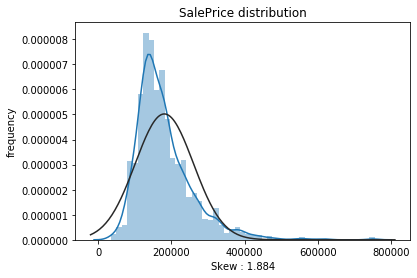

In [17]:
from scipy import stats
from scipy.stats import norm, skew 
sns.distplot(train["SalePrice"] , fit=norm)
plt.ylabel("frequency")
plt.xlabel("Skew : %.3f"%(train["SalePrice"].skew()))
plt.title('SalePrice distribution')
plt.show()

##### <span style='background :yellow' > Here we see that our Target Variable is right skewed. So we perform Log transformation to normalize the distribution

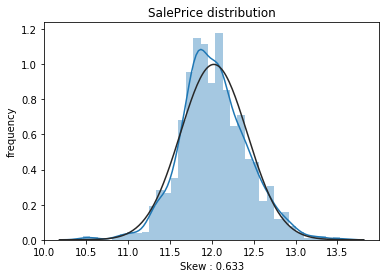

In [18]:
sns.distplot(np.log(train["SalePrice"]) , fit = norm)
plt.ylabel("frequency")
plt.xlabel("Skew : %.3f"%(np.log(train["SalePrice"].skew())))
plt.title('SalePrice distribution')
plt.show()

In [19]:
y_train = train["SalePrice"]
y_train = np.log(y_train)

#### <span style='background :violet' > Let's first concatenate the train and test set before missing value analysis

In [20]:
all_data = pd.concat((train , test)).reset_index(drop=True)
all_data.drop(["SalePrice"] , axis = 1, inplace = True)

In [21]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


## <span style='color :Green' > Missing Value Analysis

In [22]:
count = all_data.isnull().sum().sort_values(ascending = False)
percentage = (all_data.isnull().sum()/len(all_data)).sort_values(ascending=False)*100
missing_data = pd.DataFrame({"count" : count , "percentage" : percentage})
missing_data = missing_data[missing_data["count"] > 0]

In [23]:
print(missing_data)
print("No of features having missing data : {}".format(missing_data.shape[0]))

              count  percentage
PoolQC         2908   99.691464
MiscFeature    2812   96.400411
Alley          2719   93.212204
Fence          2346   80.425094
FireplaceQu    1420   48.680151
LotFrontage     486   16.660953
GarageFinish    159    5.450806
GarageQual      159    5.450806
GarageYrBlt     159    5.450806
GarageCond      159    5.450806
GarageType      157    5.382242
BsmtCond         82    2.811107
BsmtExposure     82    2.811107
BsmtQual         81    2.776826
BsmtFinType2     80    2.742544
BsmtFinType1     79    2.708262
MasVnrType       24    0.822763
MasVnrArea       23    0.788481
MSZoning          4    0.137127
BsmtHalfBath      2    0.068564
Utilities         2    0.068564
Functional        2    0.068564
BsmtFullBath      2    0.068564
Electrical        1    0.034282
Exterior2nd       1    0.034282
KitchenQual       1    0.034282
GarageCars        1    0.034282
Exterior1st       1    0.034282
GarageArea        1    0.034282
TotalBsmtSF       1    0.034282
BsmtUnfS

### <span style='color :maroon' > Imputation
Let's go one by one through all the features in order to impute the missing values.

##### **PoolQC and PoolArea**
>Since there are no missing values in PoolArea variable, we can use this as the source of truth for the question whether the house has pool or not. If the area of pool is equal to 0, there is no pool in the house.

>I found three houses where the area of  pool was greater than 0 , yet the PoolQC was set to 'NaN'. Since there is not much relation between PoolQC and PoolArea. we can fix these 3 missing values in PoolQC by imputing the values w.r.t OverallQual variable. And the rest of the observations in PoolQC variable can be imputed with 'None' because of the absence of Pool

In [24]:
# we analyse the veriable "poolarea" for better missing value imputation for the variable "PoolQC"
poolarea = all_data["PoolArea"]
poolarea[poolarea != 0]

197     512
810     648
1169    576
1181    555
1384    519
1421    738
1972    144
2418    368
2501    444
2571    228
2597    561
2708    800
Name: PoolArea, dtype: int64

In [25]:
all_data.PoolQC.dropna()

197     Ex
810     Fa
1169    Gd
1181    Ex
1384    Fa
1421    Gd
1972    Ex
2571    Ex
2708    Gd
Name: PoolQC, dtype: object

In [26]:
set(all_data.OverallQual)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [27]:
indices=all_data[(all_data['PoolQC'].isnull())&(all_data['PoolArea']>0)].index
if len(indices)>0:
    print(all_data.loc[indices,['PoolQC','PoolArea','OverallQual']])
mapper={0:'None',1:'Po',2:'Fa',3:'TA',4:'Gd',5:'Ex'}
for index in indices:
    all_data.loc[index,'PoolQC']=mapper[math.ceil(all_data.loc[index,'OverallQual']/2)]
all_data['PoolQC'].fillna('None',inplace=True)

     PoolQC  PoolArea  OverallQual
2418    NaN       368            4
2501    NaN       444            6
2597    NaN       561            3


#### **Garage variable**
>There are 7 variables related to garage. We need to make sure that all the houses wihout garage should contain 'None' for all categorical and 0 for all numerical variables.

>1 house found with garage area greater than 0 and missing values for other garage related features. Fixed this by imputing the mode for those features. The final datset has 158 houses with no garage.

In [28]:
# Check if all 159 NAs are the same observations among all 4 garage variables.
cols=['GarageFinish','GarageQual','GarageCond','GarageYrBlt']
len(all_data[all_data['GarageFinish'].isnull() & all_data['GarageQual'].isnull() & all_data['GarageCond'].isnull() & all_data['GarageYrBlt'].isnull()])==159

True

In [29]:
# Check if all 157 NAs are same observations among 159 observations in GarageQual
len(all_data[all_data['GarageType'].isnull() & all_data['GarageQual'].isnull()].index)

157

In [30]:
indices = all_data[all_data['GarageQual'].isnull() & all_data['GarageType'].notnull()].index
all_data.loc[indices,['GarageType','GarageArea','GarageCars']+cols]

,GarageType,GarageArea,GarageCars,GarageFinish,GarageQual,GarageCond,GarageYrBlt
2124,Detchd,360.0,1.0,NaN,NaN,NaN,NaN
2574,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
for index in indices:
    if pd.isnull(all_data.loc[index,"GarageArea"]) == False:
        for feature in cols:
            all_data.loc[index,feature] = all_data[feature].mode()[0]
    else:
        all_data.loc[index,"GarageType"] = "None"
            

In [32]:
# Imputing rest of the 158 observations with None or 0 values
for feature in cols+['GarageCars','GarageArea']:
    all_data[feature].fillna(0 , inplace = True)
all_data['GarageType'].fillna("None" , inplace = True)

##### **Basement Variables**

In [33]:
# check if all 79 NAs are the same observations among the variables with 80+ NAs
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
len(all_data[all_data['BsmtFinType1'].isnull() & all_data['BsmtFinType2'].isnull() & all_data['BsmtQual'].isnull() & all_data['BsmtExposure'].isnull()& all_data['BsmtCond'].isnull()].index)==79

True

In [34]:
indices = all_data[all_data["BsmtFinType1"].notnull() & (all_data["BsmtFinType2"].isnull() | all_data["BsmtQual"].isnull() | all_data["BsmtCond"].isnull() | all_data["BsmtExposure"].isnull())].index
all_data.loc[indices,cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,Gd,TA,No,GLQ,NaN
947,Gd,TA,NaN,Unf,Unf
1485,Gd,TA,NaN,Unf,Unf
2038,Gd,NaN,Mn,GLQ,Rec
2183,TA,NaN,No,BLQ,Unf
2215,NaN,Fa,No,Unf,Unf
2216,NaN,TA,No,Unf,Unf
2346,Gd,TA,NaN,Unf,Unf
2522,TA,NaN,Av,ALQ,Unf


In [35]:
for feature in cols:
    all_data.loc[indices,feature] = all_data.loc[indices,feature].fillna(all_data[feature].mode()[0])
    all_data[feature].fillna("None" , inplace = True)

In [36]:
for feature in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    all_data[feature].fillna(0 , inplace = True)

#### **Other Variables**

In [37]:
all_data['MasVnrType'].fillna('None',inplace=True)
all_data['MasVnrArea'].fillna(0,inplace=True)
all_data['MiscFeature'].fillna('None' , inplace = True)
all_data['Alley'].fillna('None',inplace=True)
all_data['Fence'].fillna('None',inplace=True)
all_data['FireplaceQu'].fillna('None',inplace=True)
# Imputing missing values with the median of houses in that Neighborhood
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)
all_data['Functional'].fillna('Typ',inplace=True)
all_data.drop('Utilities',inplace=True,axis=1)
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0],inplace=True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0],inplace=True)
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0],inplace=True)
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0],inplace=True)
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0],inplace=True)
print('Total Missing Count\t%d'%(all_data.isnull().sum().max()))

Total Missing Count	0


### <span style='color :blue' > Feature Engineering

#### **Multicollinearity**

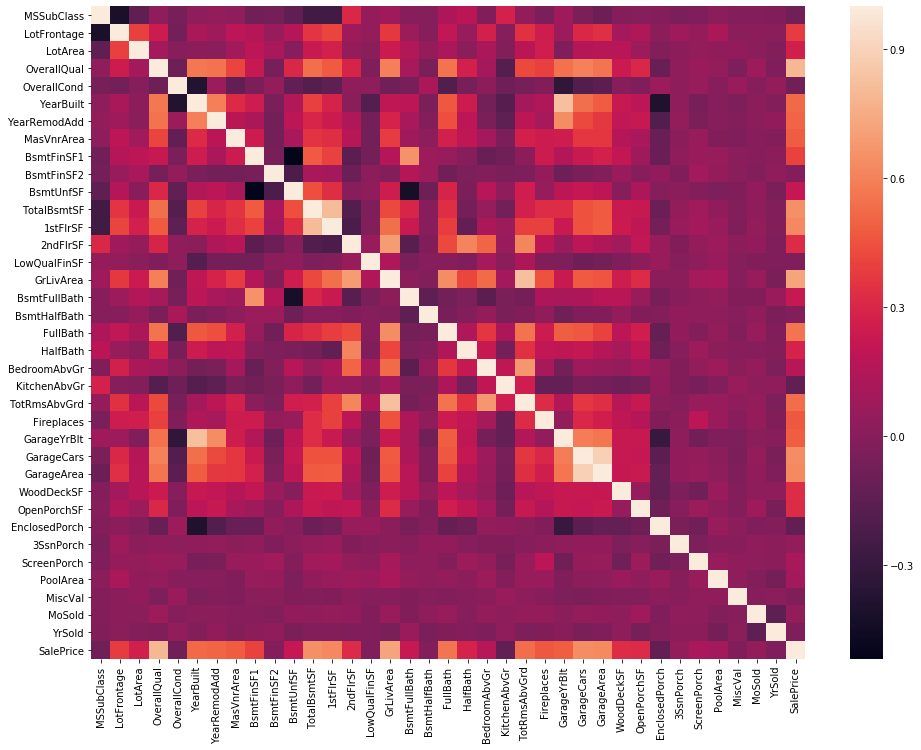

In [38]:
fig,ax = plt.subplots(figsize = (16,12))
corrMat = train.corr()
sns.heatmap(corrMat)

From the above correlation heatmap several features are highly correlated. We need to drop one of them which is less correlated to SalePrice.
1. YearBuilt and GarageYrBlt. 
2. 1stFlrSF and TotalBsmtSF.
3. GrLivArea and TotRmsAbvGrd.
4. GarageCars and GarageArea. 

In [39]:
all_data.drop(columns = ['GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageArea'],inplace = True)

In [40]:
# Converting some numerical variable to categorical
cols = ['YrSold','MoSold']
for feature in cols:
    all_data[feature] = all_data[feature].astype('str')

In [41]:
# Converting all ordinal variables
mapper = {
    'Alley':{'None':0, 'Grvl':1, 'Pave':2},
    'BsmtCond':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'BsmtExposure':{'None':0,'No':1,'Mn':2,'Av':3,'Gd':4},
    'BsmtFinType1':{'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    'BsmtFinType2':{'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    'BsmtQual':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'ExterCond':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'ExterQual':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'FireplaceQu':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'Functional':{'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7},
    'GarageCond':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'GarageFinish':{'None':0,'Unf':1,'RFn':2,'Fin':3},
    'GarageQual':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'HeatingQC':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'KitchenQual':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'LandSlope':{'None':0,'Sev':1,'Mod':2,'Gtl':3},
    'LotShape':{'None':0,'IR3':1,'IR2':2,'IR1':3,'Reg':4},
    'PavedDrive':{'None':0,'N':1,'P':2,'Y':3},
    'PoolQC':{'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'Street':{'None':0,'Grvl':1,'Pave':2}
}
all_data = all_data.replace(mapper)
all_data.head(10)

,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,854,0,0,3,1Fam,3,1,706.0,0.0,6,...,Gable,Normal,WD,0,2,856.0,0,2003,2003,2008
1,0,0,0,3,1Fam,3,4,978.0,0.0,5,...,Gable,Normal,WD,0,2,1262.0,298,1976,1976,2007
2,866,0,0,3,1Fam,3,2,486.0,0.0,6,...,Gable,Normal,WD,0,2,920.0,0,2001,2002,2008
3,756,0,0,3,1Fam,4,1,216.0,0.0,5,...,Gable,Abnorml,WD,0,2,756.0,0,1915,1970,2006
4,1053,0,0,4,1Fam,3,3,655.0,0.0,6,...,Gable,Normal,WD,0,2,1145.0,192,2000,2000,2008
5,566,320,0,1,1Fam,3,1,732.0,0.0,6,...,Gable,Normal,WD,0,2,796.0,40,1993,1995,2009
6,0,0,0,3,1Fam,3,3,1369.0,0.0,6,...,Gable,Normal,WD,0,2,1686.0,255,2004,2005,2007
7,983,0,0,3,1Fam,3,2,859.0,32.0,5,...,Gable,Normal,WD,0,2,1107.0,235,1973,1973,2009
8,752,0,0,2,1Fam,3,1,0.0,0.0,1,...,Gable,Abnorml,WD,0,2,952.0,90,1931,1950,2008
9,0,0,0,2,2fmCon,3,1,851.0,0.0,6,...,Gable,Normal,WD,0,2,991.0,0,1939,1950,2008


#### **Log transformation of highly skewed features**

In [42]:
num_col = all_data.select_dtypes(include = ['float64' , 'int64']).columns

In [43]:
skewness = all_data[num_col].skew().sort_values(ascending=False)
skewness.shape[0]

49

In [44]:
skewness = skewness[abs(skewness)>0.5]
print(skewness.head())
print(f"Performing log transformation on {skewness.shape[0]} features")

MiscVal         21.950962
PoolQC          17.750787
PoolArea        17.697766
LotArea         13.064929
LowQualFinSF    12.090757
dtype: float64
Performing log transformation on 40 features


In [45]:
for features in skewness.index:
    all_data[features] = np.log1p(all_data[features])

In [46]:
cat_col = all_data.select_dtypes(include = ["object"] ).columns

In [47]:
#Converting categorical variable to dummy variable
all_data = pd.get_dummies(all_data)

In [48]:
all_data.shape[1]

239

In [49]:
#from above we know there are 1458 rows in Train Dataset and rest are test dataset
x_train = all_data[:1458]
x_test = all_data[1458:]

# <span style='color :orange' > **Modelling**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import mean_squared_error , r2_score


#### *Splitting training set further into training and validation set*

In [51]:
sub_x_train,x_val,sub_y_train,y_val =  train_test_split(x_train,y_train,test_size =0.33,random_state=42)

### **Linear Regression**

In [52]:
#Training
lr = LinearRegression()
lr.fit(sub_x_train,sub_y_train)
log_predict = lr.predict(sub_x_train)
error = np.sqrt(mean_squared_error(sub_y_train,log_predict))
score = r2_score(sub_y_train,log_predict)
print(f'RMSE : {error}')
print(f'Training accuracy of the model : {score}')

RMSE : 0.09291828666788507
Training accuracy of the model : 0.9446034644577707


In [53]:
#cross validation
log_predict = lr.predict(x_val)
error = np.sqrt(mean_squared_error(y_val,log_predict))
score = r2_score(y_val,log_predict)
print(f'RMSE : {error}')
print(f'validity accuracy :{score}')      

RMSE : 0.12844552475120552
validity accuracy :0.901194658824211


#### *Linear Regression seems to be overfitting. As the training accuracy is close to 95% ,whereas validation accuracy is only 90.29%. We need to use a Regularized Linear Regression (i.e. Ridge Regression) in order to reduce the overfitting*

#### **Ridge Regression**

In [54]:
#Training
alphas = np.arange(0.01,10,0.1)
errors =[]
scores=[]
rlr={}
log_predict={}
for alpha in alphas:
    rlr[alpha]=Ridge(alpha)
    rlr[alpha].fit(sub_x_train,sub_y_train)
    log_predict[alpha] = rlr[alpha].predict(sub_x_train)
    error=np.sqrt(mean_squared_error(sub_y_train,log_predict[alpha]))
    score = r2_score(sub_y_train,log_predict[alpha])
    errors.append(error)
    scores.append(score)
alpha = alphas[errors.index(min(errors))]
error=np.sqrt(mean_squared_error(sub_y_train,log_predict[alpha]))
score = r2_score(sub_y_train,log_predict[alpha])
print(f'alpha chosen :{alpha}')
print(f'Training accuracy:{score}')
print(f'Error :{error}')

alpha chosen :0.01
Training accuracy:0.9443735627615303
Error :0.09311089757436938


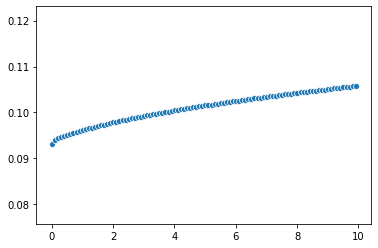

In [55]:
sns.scatterplot(alphas,errors)

In [56]:
#cross validation
log_predict = rlr[alpha].predict(x_val)
error = np.sqrt(mean_squared_error(y_val,log_predict))
score = r2_score(y_val,log_predict)
print(f'Validation accuracy : {score}')
print(f'Error :{error}')

Validation accuracy : 0.9041007812181531
Error :0.12654246815986564


#### *Now we train the model with entire training dataset*

### Training

In [57]:
rlr = Ridge(alpha)
rlr.fit(x_train,y_train)
log_predict = rlr.predict(x_train)
error = np.sqrt(mean_squared_error(y_train,log_predict))
score=r2_score(y_train,log_predict)
print(f'Training accuracy:{score}')
print(f'Error : {error}')

Training accuracy:0.9415604647280379
Error : 0.09656850435570892


### Final Prediction with test data

In [58]:
prediction = np.expm1(rlr.predict(x_test))
submission= pd.DataFrame()
submission["Id"] = test_id
submission["SalePrice"] = prediction
submission.head()

,Id,SalePrice
0,1461,119854.606629
1,1462,169122.237614
2,1463,183518.007530
3,1464,197231.735790
4,1465,206661.147741


In [77]:
submission.to_csv("submission_House_Price.csv",index=False)

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xelatex

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex
